In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [11]:
import os 

corpus = []

def read_text_file(file_path): 
    with open(file_path, 'r') as f: 
        file = f.read()
        for line in file.split("\n"):
            corpus.append(line)
for file in os.listdir():
    if file.endswith(".txt"): 
        file_path = f"{file}"
        read_text_file(file_path) 
print(len(corpus))

3186


In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

5763


In [13]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [14]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre"))
print(input_sequences[50:100])

[[   0    0    0    0    0    0    0    0    2   40    9    1  609    3
     4]
 [   0    0    0    0    0    0    0    2   40    9    1  609    3    4
  1921]
 [   0    0    0    0    0    0    2   40    9    1  609    3    4 1921
   405]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0  610
     4]
 [   0    0    0    0    0    0    0    0    0    0    0    0  610    4
   264]
 [   0    0    0    0    0    0    0    0    0    0    0  610    4  264
     2]
 [   0    0    0    0    0    0    0    0    0    0  610    4  264    2
   331]
 [   0    0    0    0    0    0    0    0    0  610    4  264    2  331
     4]
 [   0    0    0    0    0    0    0    0  610    4  264    2  331    4
   332]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    2
  1134]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2 1134
    45]
 [   0    0    0    0    0    0    0    0    0    0    0    2 1134   45
    21]
 [   0    0    0    0    0    0    0    

In [36]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 200, input_length = max_sequence_len - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_words, activation = "softmax")
])

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [41]:
with tf.device('/CPU:0'):
    history = model.fit(xs, ys, epochs = 100, verbose = 1, batch_size = 100)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.0420 - loss: 7.8531
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.0529 - loss: 7.0594
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.0639 - loss: 6.7819
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.0759 - loss: 6.4827
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.0792 - loss: 6.2525
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.0914 - loss: 5.9414
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1026 - loss: 5.6744
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1199 - loss: 5.4188
Epoch 9/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1422 - loss: 5.1217
Epoch 10/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1666 - loss: 4.8116
Epoch 11/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1993 - loss: 4.5221
Epoch 12/100
178/178 ━━━━━━━━━

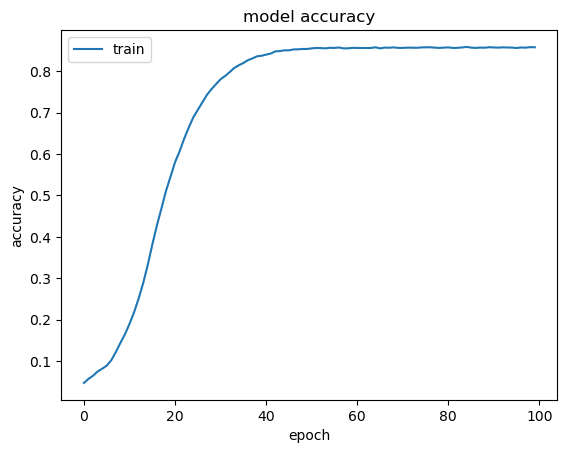

In [42]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
seed_text = "Compassion and flowers"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━